In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv('housing.csv')

In [159]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


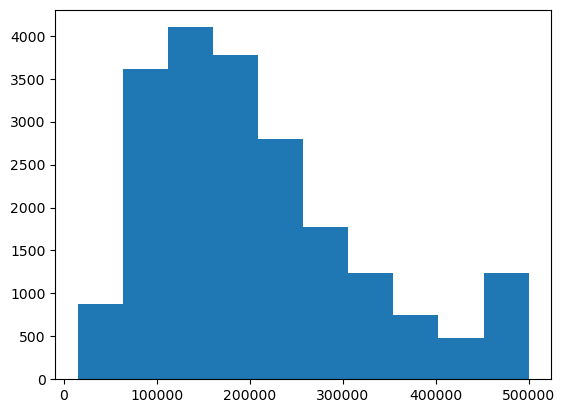

In [160]:
plt.hist(df.median_house_value.values)
plt.show()

In [161]:
colsToUse = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 
             'median_income', 'median_house_value']
dfToUse = df[colsToUse]
dfToUse.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Question 1

In [162]:
dfToUse.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

In [163]:
median = np.median(dfToUse.population.values)
median

1166.0

In [164]:
n = len(dfToUse)
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [165]:
n = len(dfToUse)

#Split the data (60%/20%/20%)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [166]:
df_train = dfToUse.iloc[idx[:n_train]]
df_val = dfToUse.iloc[idx[n_train:n_train+n_val]]
df_test = dfToUse.iloc[idx[n_train+n_val:]]

In [167]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10385,33.60,-117.65,15.0,5736.0,NaN,2529.0,762.0,6.4114,278700.0
1943,38.62,-120.91,12.0,4545.0,748.0,2033.0,718.0,4.1843,207600.0
7490,33.93,-118.23,35.0,1149.0,277.0,909.0,214.0,1.7411,96700.0
16889,37.59,-122.37,39.0,4645.0,1196.0,2156.0,1113.0,3.4412,353800.0
11416,33.70,-117.98,16.0,5127.0,631.0,2142.0,596.0,7.8195,390500.0


In [168]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [169]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [170]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10385,33.60,-117.65,15.0,5736.0,NaN,2529.0,762.0,6.4114
1943,38.62,-120.91,12.0,4545.0,748.0,2033.0,718.0,4.1843
7490,33.93,-118.23,35.0,1149.0,277.0,909.0,214.0,1.7411
16889,37.59,-122.37,39.0,4645.0,1196.0,2156.0,1113.0,3.4412
11416,33.70,-117.98,16.0,5127.0,631.0,2142.0,596.0,7.8195


# Question 3

In [171]:
#fill missing values with 0
X_train_0 = df_train.fillna(0).values

In [172]:
def train_linear_regression_no_rmse(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [173]:
len(X_train_0)

12384

In [174]:
w0, w = train_linear_regression_no_rmse(X_train_0, y_train)

y_pred = w0 + X_train_0.dot(w)

In [175]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [176]:
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [177]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.33

In [178]:
#fill missing values with mean value
mean_total_bedrooms =  df_train.total_bedrooms.mean()
mean_total_bedrooms

541.7263089218725

In [179]:
def prepare_X_mean(df, variableToMean):
    #mean =  df[variableToMean].mean()
    mean = mean_total_bedrooms
    #TO DO: fill only variableToMean
    df_num = df.fillna(mean)
    X = df_num.values
    return X

In [180]:
X_train_mean  = prepare_X_mean(df_train, 'total_bedrooms')

w0, w = train_linear_regression_no_rmse(X_train_mean, y_train)

y_pred = w0 + X_train_mean.dot(w)

In [181]:
X_val = prepare_X_mean(df_val, 'total_bedrooms')
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.33

# Question 4

In [182]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [185]:
regs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
# fill missing values with 0
X_train_0 = prepare_X(df_train)
X_val = prepare_X(df_val)

min_rmse = 10
best_r  = regs[0]

for r in regs:
    w0, w = train_linear_regression_reg(X_train_0, y_train, r)
    y_pred = w0 + X_train_0.dot(w)
       
    y_pred = w0 + X_val.dot(w)
    current_rmse = rmse(y_val, y_pred)
    #print(current_rmse)
    if current_rmse< min_rmse:
        min_rmse = current_rmse
        best_r = r
        #print(best_r)

best_r

0
1e-06
0.0001
0.001


# Question 5

In [194]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n = len(dfToUse)

#Split the data (60%/20%/20%)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

rmse_scores = np.zeros(len(seed_values))

for sidx, seedv in enumerate(seed_values):
    idx = np.arange(n)
    
    np.random.seed(seedv)
    np.random.shuffle(idx)
    
    df_train = dfToUse.iloc[idx[:n_train]]
    df_val = dfToUse.iloc[idx[n_train:n_train+n_val]]
    df_test = dfToUse.iloc[idx[n_train+n_val:]]
       
    X_train  = prepare_X(df_train)
    X_val = prepare_X(df_val)
    w0, w = train_linear_regression_no_rmse(X_train, y_train)

    y_pred = w0 + X_val.dot(w)
    current_rmse = rmse(y_val, y_pred)
    
    rmse_scores[sidx] = current_rmse
    
STD = np.std(rmse_scores) 
STD

0.12087020292311806

In [195]:
round(STD, 3)

0.121

# Question 6

In [196]:
seed = 9

idx = np.arange(n)
    
np.random.seed(seed)
np.random.shuffle(idx)

df_train = dfToUse.iloc[idx[:n_train]]
df_val = dfToUse.iloc[idx[n_train:n_train+n_val]]
df_test = dfToUse.iloc[idx[n_train+n_val:]]

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

In [197]:
y_full_train = np.concatenate([y_train, y_val])

In [198]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [199]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.5720565998087405